In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [89]:
data=pd.read_csv('datasets_13720_18513_insurance(1).csv')

In [90]:
data1=data.copy()

In [91]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
data1.shape

(1338, 7)

In [93]:
#Checking if there are null values in the dataset and the datatype of the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observation

1.There are 3 features with numeric values (age, bmi, children)

2.There are 3 features with categorical values (sex, smoker, region).

The target variable (charges) is numeric

In [94]:
data1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]
    
data1['cbmi'] = data1['bmi'].apply(lambda x: "none")
data1['cage'] = data1['age'].apply(lambda x: "none")

for idx, row in data1.iterrows():
    data1.at[idx, 'cage'] = age_category(row['age'])
    data1.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    
by_age = data1.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_sex = data1.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = data1.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)

by_region = data1.groupby(by='region').size()
print (by_region)
print ('-'*80)

by_children = data1.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = data1.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
female    662
male      676
dtype: int64
--------------------------------------------------------------------------------
smoker
no     1064
yes     274
dtype: int64
--------------------------------------------------------------------------------
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
--------------------------------------------------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


### Observation

1.To understand correlation between the input or the independent variables, I classified the ages and BMI into specific categories. 

2.The above analysis shows the stats like number of male and female, smokers and non-smokers, etc. from the input data.

3.Taking the standard BMI ranges, I categorized the input samples into below-weight, normal-weight, over-weight and obese.

4.From the above data we can observe below:

    a.Input data contains an even distribution of male and female samples

    b.Majority of them are non-smokers with 1064 samples

    c.Majority of the samples are in age groups 20-29 and 40- 49 with the numbers 280 and 279 respectively.

    d.A major sample of input data contains persons with no children with 574.

    e.The data is evenly distributed across 4 regions with the region of southeast having slightly more samples.

    f.Majority the sample fall under the category of obese

# EDA

## Univarite

Data distribution analysys


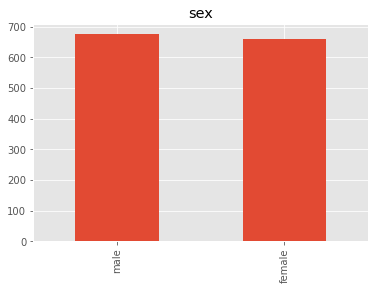

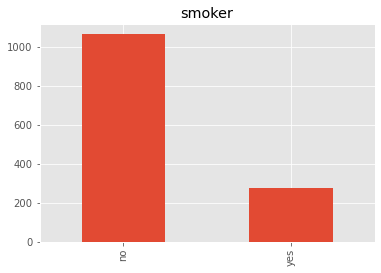

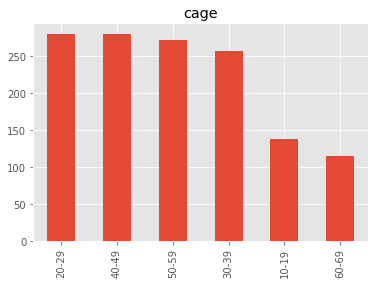

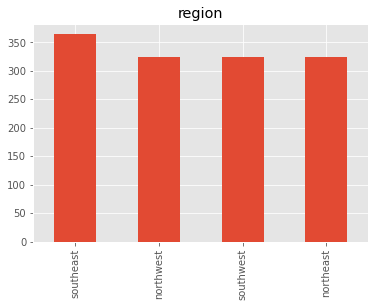

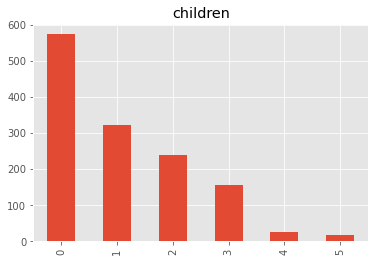

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['sex','smoker','cage','region','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    data1 = data1.sort_values(by=[v])
    data1[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

## Bivariate

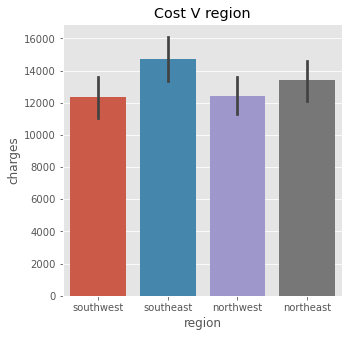

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=data1)
plt.title('Cost V region')
plt.show()

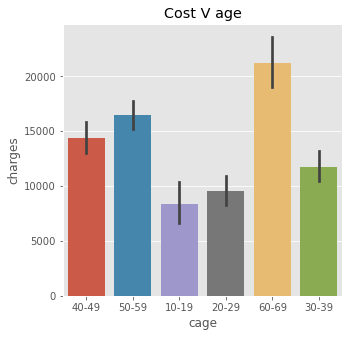

In [101]:
plt.figure(figsize=(5,5))
sns.barplot(x='cage',y='charges',data=data1)
plt.title('Cost V age')
plt.show()

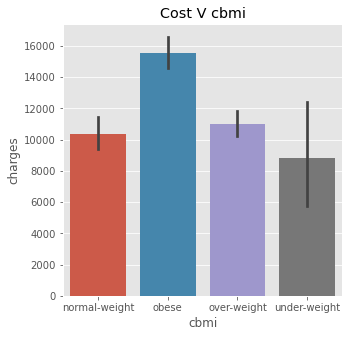

In [102]:
plt.figure(figsize=(5,5))
sns.barplot(x='cbmi',y='charges',data=data1)
plt.title('Cost V cbmi')
plt.show()

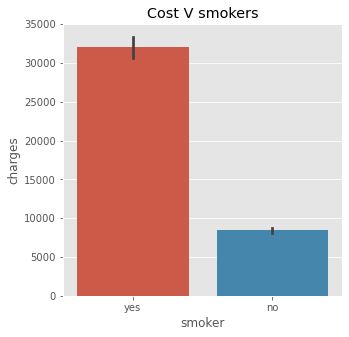

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=data1)
plt.title('Cost V smokers')
plt.show()

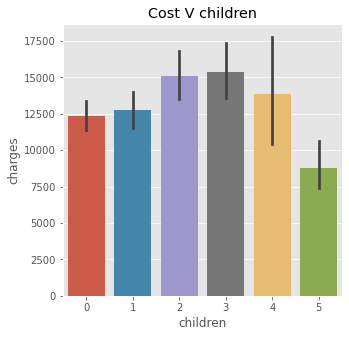

In [103]:
plt.figure(figsize=(5,5))
sns.barplot(x='children',y='charges',data=data1)
plt.title('Cost V children')
plt.show()

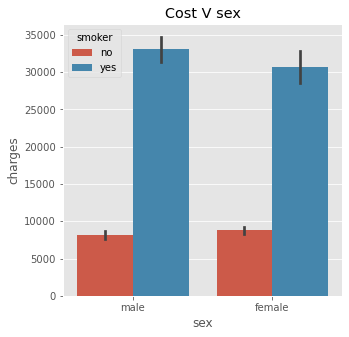

In [99]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=data1)
plt.title('Cost V sex')
plt.show()

### Observation

From the above bar graphs, we can deduce the below facts.

1.Insurance costs are higher among male population

2.Insurance costs are highest among the population of age groups 60-69.

3.Insurance costs increases among the smokers

4.Insurance costs increases among the obese population

5.Insurance costs are higher among the population in southwest region

6.Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children.

# Multivariate

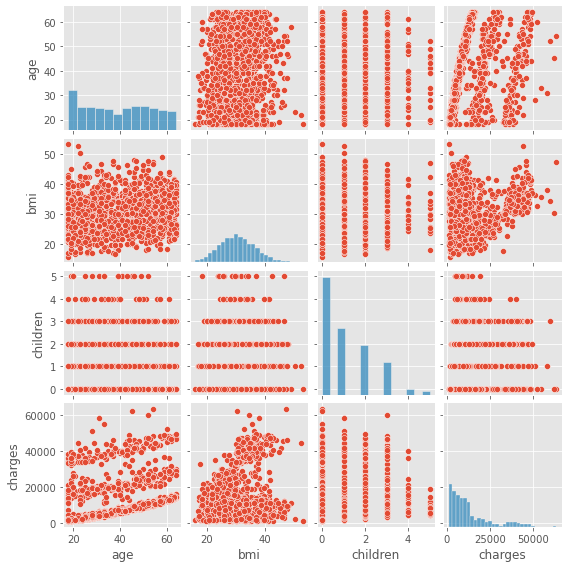

In [97]:
sns.pairplot(data, size=2)

# Data preprocessing

<AxesSubplot:xlabel='region', ylabel='charges'>

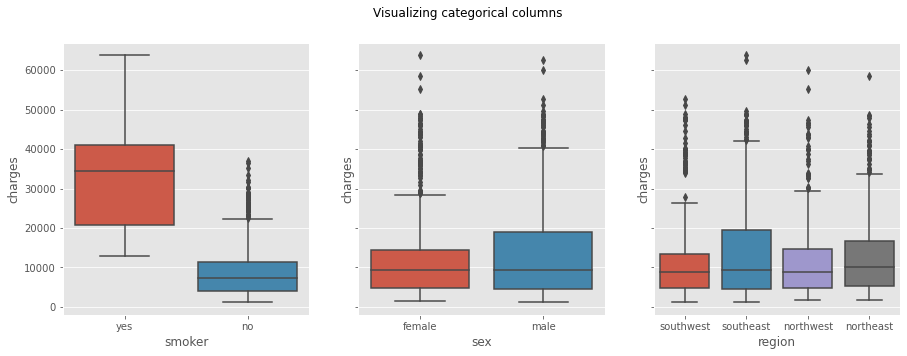

In [15]:
fig, axes=plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxplot(x='smoker',y='charges',data=data1,ax=axes[0])
sns.boxplot(x='sex',y='charges',data=data1,ax=axes[1])
sns.boxplot(x='region',y='charges',data=data1,ax=axes[2])

#checking for outliers

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

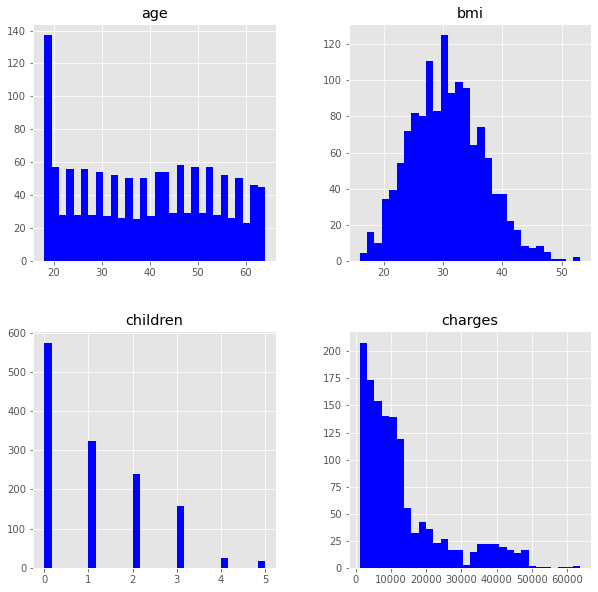

In [16]:
data1[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='blue')

### Observation

1.Histograms graph is plotted to know the count with respect to Age, BMI, children and
charges,

2.Age: Patients range from 18 to 64 years of age. The ages are fairly evenly spread although there are slightly more patients on the younger end of this range.

3.Children: Most of the patients have 0 or very few children. Only a small number of them have 4 or 5 children

# Converting categorical data into numerical data

In [17]:
data1['sex']=data1['sex'].apply({'male':0,'female':1}.get)
data1['smoker']=data1['smoker'].apply({'yes':1,'no':0}.get)
data1['region']=data1['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [18]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# Feature selection

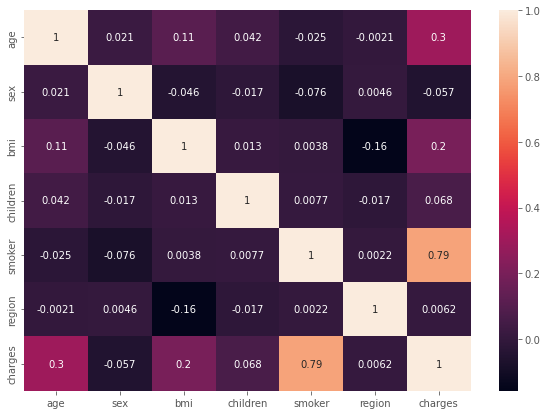

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(),annot=True)
plt.show()

### Observation

1.There appears to be a strong correlation between charges and smoking with smokers typically having a higher medical cost than non-smokers

2.here the sex correlation with charge is really low so we can drop those and start the model creation

3.BMI and age are only slightly correlated with charges

4.Number of children appears to have little to no correlation with charges.

In [20]:
x= data1.drop(['charges','sex'],axis=1)
y=data1.charges

# Model creation

train/test split

split data into two parts:training set and testing set

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [22]:
y_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

In [23]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

As part of evaluation, I considered multiple regression algorithms like decision trees, Support Vector Machinesfor regression,Gradient Boosting regression, Xgboost.

# Linear regression


In [32]:
linreg= LinearRegression()

In [33]:
linreg.fit(X_train,y_train)
y_pred1= linreg.predict(X_test)

# SVR

In [34]:
from sklearn.svm import SVR

In [35]:
svm = SVR()
svm.fit(X_train,y_train)

SVR()

In [36]:
y_pred2 = svm.predict(X_test)

# Random forest regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred3 = rf.predict(X_test)

# GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [42]:
y_pred4 = gr.predict(X_test)

# Decision tree regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
y_pred5 = dtr.predict(X_test)

# XGboost regressor

In [ ]:
!pip install xgboost

In [54]:
import xgboost as xgb

In [55]:
xgb = xgb.XGBRegressor(learning_rate= 0.05, n_estimators=100)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred6=xgb.predict(X_test)

# R2 scores for all algorithms

In [57]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [58]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)
print("R2_Scores")
print("Linear regression=",score1)
print("SVR=",score2)
print("Random forest=",score3)
print("GraidentBoostingRegressor=",score4)
print("DecisionTreeregression",score5)
print('XGboost=',score6)

R2_Scores
Linear regression= 0.7697211527941855
SVR= -0.08162002479967256
Random forest= 0.8539645164117052
GraidentBoostingRegressor= 0.8711592113606409
DecisionTreeregression 0.7261316017058352
XGboost= 0.8658856322531595


### Observation

Comparing all the R2 scores of the models we predicted Gradient Boosting Regressor has the best R2 score and XGboost with second best R2 score

# Mean absloute error for all Algorithms

In [59]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)
s5 = metrics.mean_absolute_error(y_test,y_pred5)
s6= metrics.mean_absolute_error(y_test,y_pred6)


print("Mean Absolute Error")
print("Linear regression=",s1)
print("SVR=",s2)
print("Random forest=",s3)
print("GraidentBoostingRegressor=",s4)
print("DecisionTreeregression",s5)
print('XGboost=',s6)

Mean Absolute Error
Linear regression= 4151.409812177045
SVR= 8227.244856225088
Random forest= 2488.8350952502497
GraidentBoostingRegressor= 2398.7121484935847
DecisionTreeregression 2975.29344228607
XGboost= 2339.2076964952


### Observation

Comparing all the Mean absolute Errors of the models XGboost has best Mean Absolute Error and Gradient Boosting Regressor as second best Mean absolute Errors

# Model Comparsion Report

## Comparing Actual value with predicted values

In [60]:
df = pd.DataFrame({'Actual':y_test,'Linreg':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4,'dtr':y_pred5,'xgb':y_pred6})
df

,Actual,Linreg,svm,rf,gr,dtr,xgb
764,9095.06825,8989.005625,9504.196530,9856.205195,10326.194184,8604.48365,9780.001953
887,5272.17580,7125.962189,9450.252213,5502.334737,5748.758519,5469.00660,5689.307129
890,29330.98315,36996.664796,9599.642669,28308.499191,29407.250719,28950.46920,27215.095703
1293,9301.89355,9543.841342,9510.785646,11065.155649,9822.418675,9500.57305,9336.788086
259,33750.29180,26961.073879,9383.162262,34622.883104,34294.979661,33732.68670,34685.855469
...,...,...,...,...,...,...,...
701,9541.69555,16191.290426,9540.344034,12412.600569,11742.734533,9875.68040,10630.103516
672,4399.73100,6687.323375,9450.053889,4949.322087,6015.680176,4415.15880,6123.322754
1163,2200.83085,2123.871955,9380.390997,3712.084837,3026.985319,1712.22700,3427.828857
1103,11363.28320,14640.825191,9581.800792,12673.212971,12527.800737,11743.93410,12072.284180


### Observation

The above table represents the Actual values of the data and the predicted values for different models

## Plotting Actual values to predicted values

In [61]:
import matplotlib.pyplot as plt

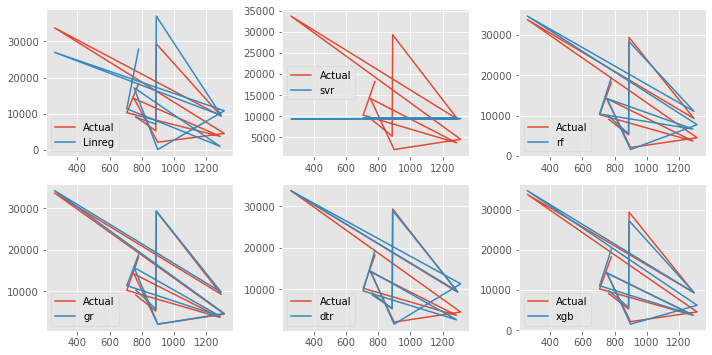

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Linreg'].iloc[0:11],label="Linreg")
plt.legend()

plt.subplot(232)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(233)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['rf'].iloc[0:11],label="rf")
plt.legend()


plt.subplot(234)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['gr'].iloc[0:11],label="gr")
plt.legend()

plt.subplot(235)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['dtr'].iloc[0:11],label="dtr")
plt.legend()

plt.subplot(236)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['xgb'].iloc[0:11],label="xgb")

plt.tight_layout()
plt.legend()

### Observation

Ploting of the actual values vs the predicted value for all the models and you can see Gradient boosting regressor almost similar to the actual values data

# Report on Challenges faced

1.Understanding the  relation all the parameters in the data with the Charges parameter

2.Comparing values of the charges with the regions so that we can understand which region has high cost charges

3.Categorizing the bmi values into below-weight, normal-weight, over-weight and obese.

4.Checking if there are outliers in the data

5.Understanding how all the models are working 

6.Understanding the comparison of the predicted values with the actual values based on the plots


# Test cases 

### non smoker

In [104]:
data={'age':30,'bmi':25,'children':2,'smoker':0,'region':2}
index=[0]
cust_data1=pd.DataFrame(data,index)
cust_data1

,age,bmi,children,smoker,region
0,30,25,2,0,2


In [105]:
cost_pred= gr.predict(cust_data1)
print('the medical insurance cost of the new customer is:',cost_pred)

the medical insurance cost of the new customer is: [7955.47505607]


### smoker

In [72]:
data={'age':50,'bmi':25,'children':2,'smoker':1,'region':2}
index=[0]
cust_data1=pd.DataFrame(data,index)
cust_data1

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [73]:
cost_pred= gr.predict(cust_data1)
print('the medical insurance cost of the new customer is:',cost_pred)

the medical insurance cost of the new customer is: [24953.66378865]


# Conclusion

The Project uses various machine learning regression models to forecast charges of health insurance based on specific attributes on dataset. The R2 score findings are summarized above shows that Gradient Boosting offers the best efficiency, with an accuracy of 87.11.Gradient boosting can therefore be used in the estimation of insurance costs with better performance than other regression models. Forecasting insurance prices supported sure factors facilitate insurance suppliers to draw in customers and save time in formulating plans for each individual. Machine learning can considerably minimize these individual efforts in policymaking, as metric capacity unit models can do cost calculation in a very short time.